# Dataset

Descargar y descomprimir el dataset desde dropbox.

In [ ]:
!wget -O clothes.zip https://www.dropbox.com/scl/fi/p59aaokhqfv20evxdlwqw/test_pepeganga.zip?rlkey=0hyr40zlthg5upt4g7ougphkg&st=i1axj4uy&dl=1

In [ ]:
!unzip clothes.zip

Definir el path al archivo principal (**test_pepeganga**). Dentro, este tiene una carpeta llamada **test** con las imágenes de los productos y un archivo CSV llamado **test.csv** con metadata de estos mismos.

In [21]:
DATA_PATH = 'test_pepeganga'
DATA_IMAGES_PATH = 'test_pepeganga/test'

En el archivo **test.csv** la metadata se relaciona con los productos con la columna **Id**. Por lo tanto, se puede crear un DataFrame de pandas para representar ese CSV con esas mismas Ids y no con unas default incrementales.

In [13]:
import os
import pandas as pd

data = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), sep = ';') # Acá se crea el DF con ids incrementales default
data.set_index("Id", inplace = True) # Acá se corrige el index para cada producto

Ejecutar en caso de que se quiera visualizar la data.

In [14]:
data

,Url,ProductId,ImageUrl,Title,Brand,CategoryTree,GlobalCategory,ProductCode,ProductDescription,ProductDescriptionEN,GlobalCategoryEN
Id,,,,,,,,,,,
141877,https://www.pepeganga.com/sillin-d3735-mtb-rut...,79778,https://pepeganga.vteximg.com.br/arquivos/ids/...,Sillín D3735 MTB Ruta - GW,GW,Deportes/Accesorios/otros,Deportes,53598,Este fantástico Sillín para bicicleta que te t...,This fantastic bicycle saddle that GW brings y...,Sports
106641,https://www.pepeganga.com/juego-de-sala-navara...,59065,https://pepeganga.vteximg.com.br/arquivos/ids/...,Juego de Sala Navara Cuero y Mesa de Centro Ho...,Hogar venecia,Muebles/Muebles de Sala/Juegos de Sala,Muebles,SLNAVCOCO,Decora tu hogar con este espectacular y fabulo...,Decorate your home with this spectacular and f...,Furniture
107803,https://www.pepeganga.com/comedero-doble-skyba...,60090,https://pepeganga.vteximg.com.br/arquivos/ids/...,Comedero Doble Skybar Moderna Blanco Para Perr...,Moderna,Mascotas/Perros/Comederos y Bebederos,Mascotas,AK50-354,En este practico y moderno Comedero Doble Skyb...,In this practical and modern Double Skybar Fee...,Pets
105533,https://www.pepeganga.com/sofa-cama-porto-cuer...,58301,https://pepeganga.vteximg.com.br/arquivos/ids/...,Sofacama Porto Cuero Sintético Negro - Hogar V...,Hogar venecia,Muebles/Muebles de Sala/Sofa Camas,Muebles,PORTO,El Sofacama Porto cuenta con una estructura en...,"The Porto Sofabed has a pine wood structure, f...",Furniture
110932,https://www.pepeganga.com/juego-de-sabanas-kar...,61985,https://pepeganga.vteximg.com.br/arquivos/ids/...,Juego de Sábanas Karytex Semidoble - Coral,Karytex,Hogar/Ropa de cama/Juegos de Sabanas,Hogar,11636-Coral,Disfruta de la suavidad que te brinda este esp...,Enjoy the softness that this spectacular Karyt...,Home
...,...,...,...,...,...,...,...,...,...,...,...
122714,https://www.pepeganga.com/pijama-2-piezas-cami...,69692,https://pepeganga.vteximg.com.br/arquivos/ids/...,Pijama 2 Piezas Camiseta Blanca y Pantalón Adu...,Garfield,Ropa y Zapatos/Adultos/Ropa Mujer,Ropa y Zapatos,GFCD05,"Vive una noche grandiosa de mucho descanso, co...","Live a great night of rest, with these fabulou...",Clothes and Shoes
83405,https://www.pepeganga.com/set-2-chupos-fun-sty...,44779,https://pepeganga.vteximg.com.br/arquivos/ids/...,Set 2 Chupos Fun Style - 6 a 18m,TOMMEE TIPPEE,Bebes/Alimentacion/Teteros y chupos/Chupos de ...,Bebes,MAY00015-02,¡Los chupos Fun Style de Tommee Tippee convert...,Tommee Tippee's Fun Style pacifiers will turn ...,Babies
113076,https://www.pepeganga.com/figura-periquito-opa...,63606,https://pepeganga.vteximg.com.br/arquivos/ids/...,Figura Periquito Opalino Amarillo Nanoblock,Nanoblock,Jugueteria/Didacticos/Bloques,Jugueteria,NBC_004,Ahora tus hijos podrán disfrutar del hobby de ...,Now your children can enjoy the hobby of const...,Toy Store


Como solamente estamos interesados en las columnas **GlobalCategoryEN** y **ProductDescriptionEN**, podemos eliminar las demás de la data.

In [15]:
data[['GlobalCategoryEN', 'ProductDescriptionEN']]

,GlobalCategoryEN,ProductDescriptionEN
Id,,
141877,Sports,This fantastic bicycle saddle that GW brings y...
106641,Furniture,Decorate your home with this spectacular and f...
107803,Pets,In this practical and modern Double Skybar Fee...
105533,Furniture,"The Porto Sofabed has a pine wood structure, f..."
110932,Home,Enjoy the softness that this spectacular Karyt...
...,...,...
122714,Clothes and Shoes,"Live a great night of rest, with these fabulou..."
83405,Babies,Tommee Tippee's Fun Style pacifiers will turn ...
113076,Toy Store,Now your children can enjoy the hobby of const...


Obtener la imagen, descripción y categoría de un producto en base a su ID.

In [52]:
from PIL import Image

def get_image(id):
  IMG_PATH = os.path.join(DATA_IMAGES_PATH, str(id) + ".jpg")
  img = Image.open(IMG_PATH)
  return img

# get_description, además de recibir el id del producto, recibe el
# DataFrame con el que estemos trabajando ('data').

def get_description(dataframe, id):
  desc = dataframe.loc[id]["ProductDescriptionEN"]
  return desc

def get_category(dataframe, id):
  cat = dataframe.loc[id]["GlobalCategoryEN"]
  return cat

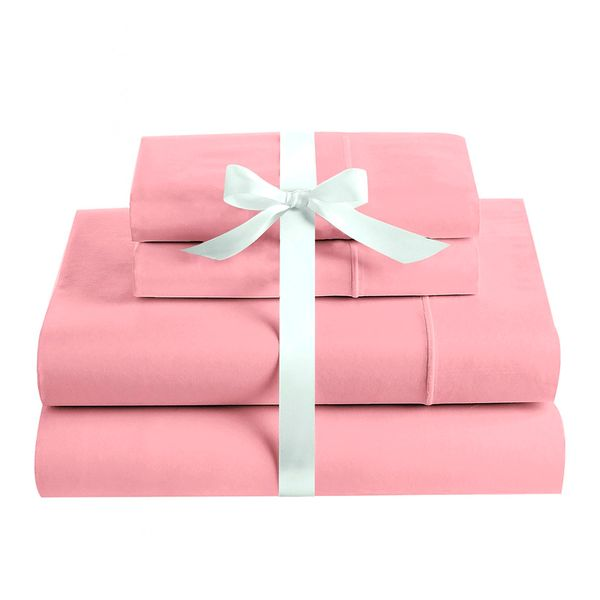

In [23]:
get_image(110932)

In [24]:
get_description(data, 110932)

'Enjoy the softness that this spectacular Karytex Sheet Set gives you, with which you can obtain unique nights of relaxation and comfort, since it has soft microfiber in contact with your skin. It is also 100% Colombian for a greater duration and resistance, and the best thing is that it is easy to wash and dry. Go ahead and buy it now!'

In [53]:
get_category(data, 110932)

'Home'

Guardar en la lista **IMAGES** todas las imágenes, en la lista **DESCRIPTIONS** todas las descripciones y en la lista **CATEGORIES** todas las categorías.

In [54]:
from PIL import Image
from skimage import io

def get_all_images(dataframe):
    images = []
    for id in dataframe.index:
        img_path = os.path.join(DATA_IMAGES_PATH, str(id) + ".jpg")
        img = io.imread(img_path)
        images.append(img)
    return images

def get_all_descriptions(dataframe):
  # Recorrer todo el DF con las ids de los productos
  # y para cada uno de ellos llamar a get_description(dataframe, id).
  DESCRIPTIONS = []
  for id in dataframe.index:
    DESCRIPTIONS.append(get_description(dataframe, id))
  return DESCRIPTIONS

def get_all_categories(dataframe):
  CATEGORIES = []
  for id in dataframe.index:
    CATEGORIES.append(get_category(dataframe, id))
  return CATEGORIES

In [55]:
IMAGES = get_all_images(data)
DESCRIPTIONS = get_all_descriptions(data)
CATEGORIES = get_all_categories(data)

Visualizar las imágenes, descripciones y categorías obtenidas.

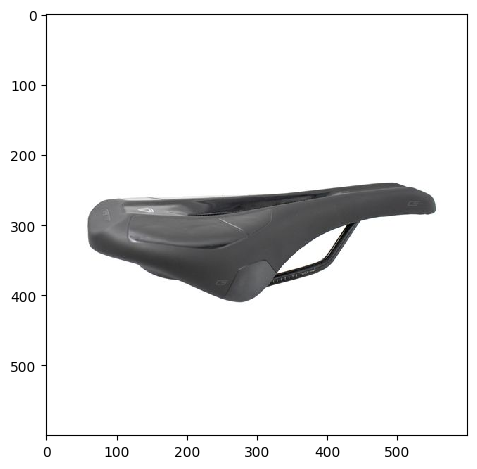

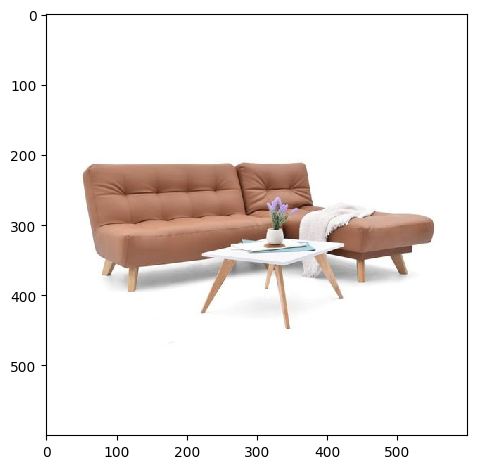

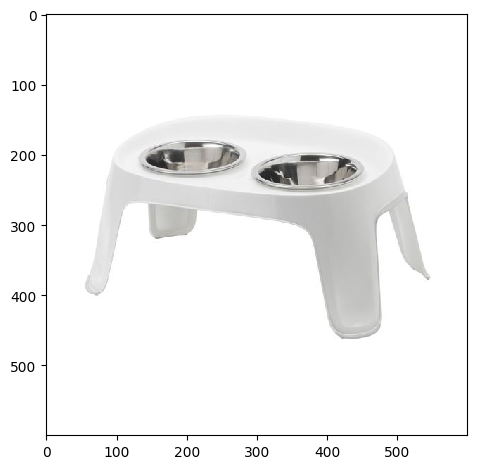

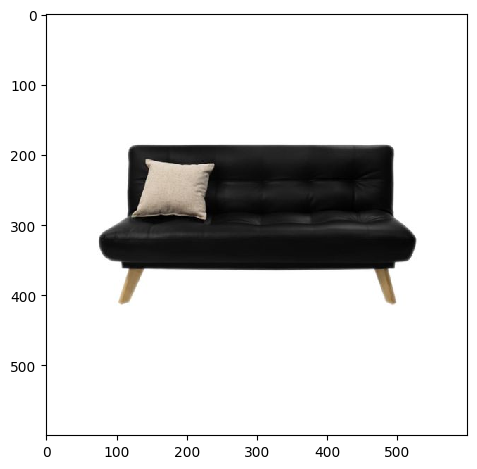

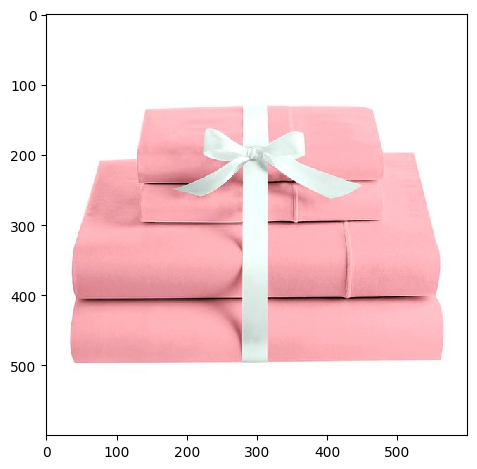

In [38]:
for img in IMAGES[:5]:
  io.imshow(img)
  io.show()

In [45]:
for description in DESCRIPTIONS[:3]:
  print(description)

This fantastic bicycle saddle that GW brings you, has an Anatomy Fit design and its high-density foam padding that provides you with comfort at all times. Complement your bike with the best accessories and go riding in complete safety and comfort. Don't wait any longer and take it now!
Decorate your home with this spectacular and fabulous Navara Living Room Game, in which you can share pleasant moments with your family and friends, and it will also give your home a modern, elegant and sophisticated style. Its structure is made of wood immune to weevils and high-density foam on the seat and back, it also has a quilted design, upholstered in excellent quality synthetic leather and legs in natural pine wood with a glossy lacquered finish. now!






See installation instructions
In this practical and modern Double Skybar Feeder you can provide your pet with their favorite food and drink comfortably and safely during the day. Its design has plastic rings that prevent the sound of metal dis

In [56]:
for category in CATEGORIES[:3]:
  print(category)

Sports
Furniture
Pets


# Descargar y preparar CLIP

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"

# Preprocess es una funcionalidad de CLIP que permite convertir las imágenes a tensores.
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 46.4MiB/s]


Definir funciones para obtener las representaciones vectoriales, según CLIP, de las imágenes y descripciones.

In [49]:
def get_image_embedding(image):
  image_tensor = preprocess(Image.fromarray(image)).unsqueeze(0).to(device)
  with torch.no_grad():
    image_embedding = model.encode_image(image_tensor)
  return image_embedding

'''
# 'unsqueeze(0)' agrega una batch dimension, lo cual es necesario para CLIP
# cuando se convierte una img a tensor.

# torch.no_grad le pide a PyTorch que no se calculen los gradientes
# para mejorar el rendimiento.
'''

def get_text_embedding(text):
  text_tensor = clip.tokenize(text).to(device)
  with torch.no_grad():
    text_embedding = model.encode_text(text_tensor)
  return text_embedding

Obtener embeddings para cada imagen y categoría.

In [58]:
IMAGES_EMBEDDINGS = []
for image in IMAGES:
  IMAGES_EMBEDDINGS.append(get_image_embedding(image))

# No es posible obtener los embeddings de las descripciones
# porque hay algunas que superan el límite de model.encode_text()

CATEGORIES_EMBEDDINGS = []
for category in CATEGORIES:
  CATEGORIES_EMBEDDINGS.append(get_text_embedding(category))

# IMG - CATEGORY

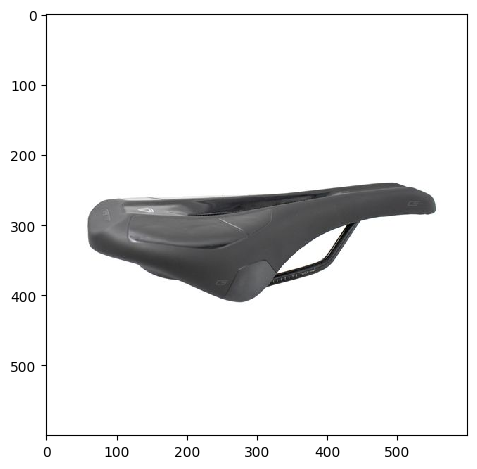

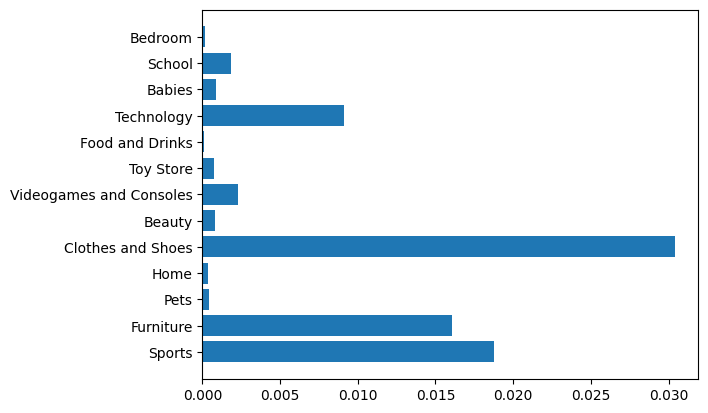

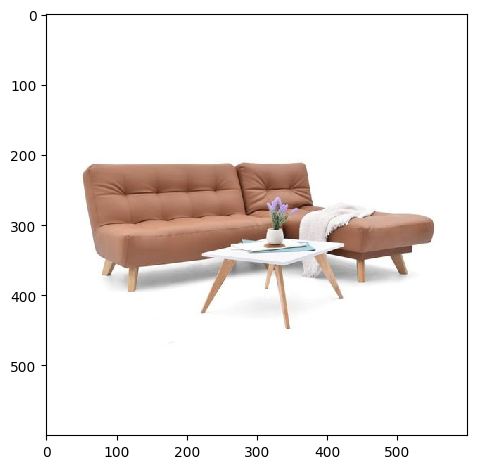

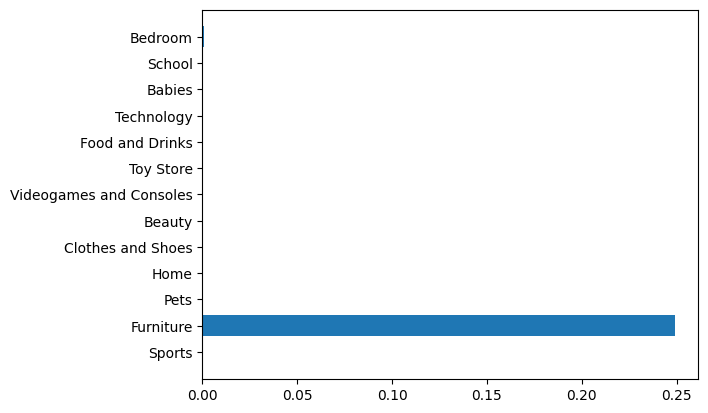

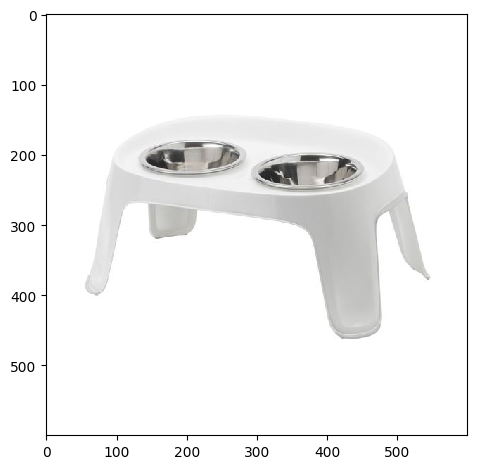

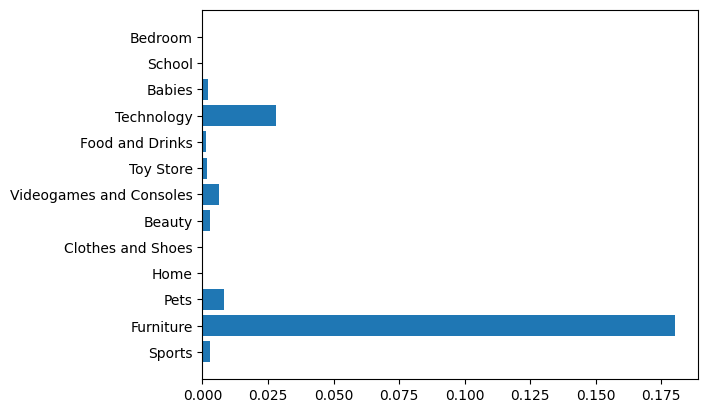

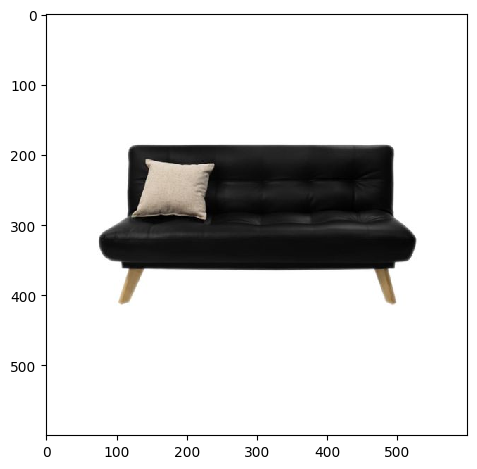

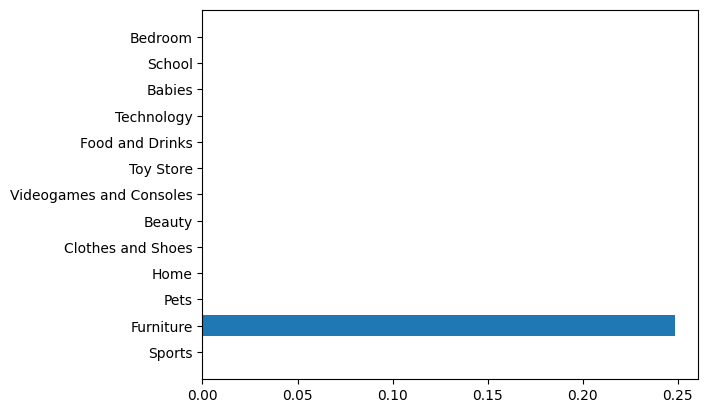

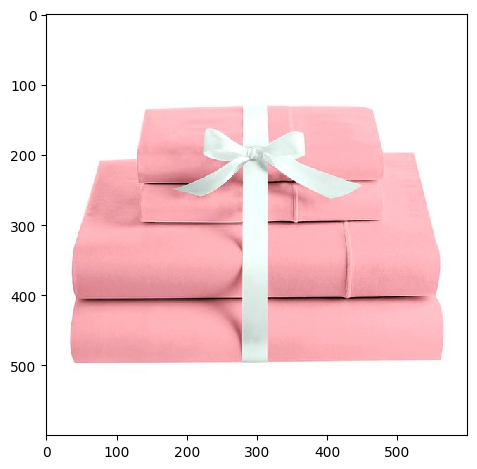

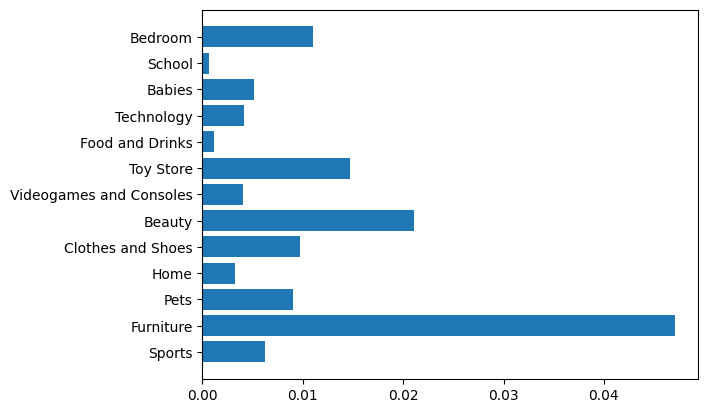

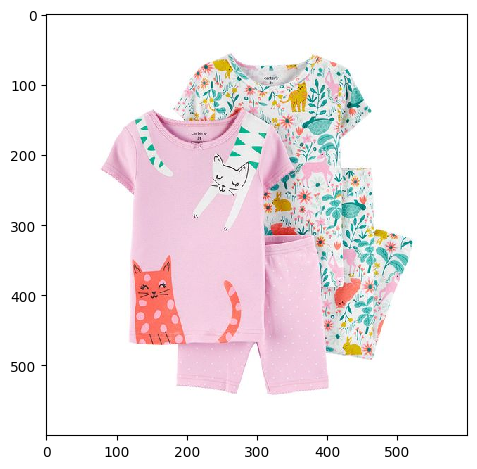

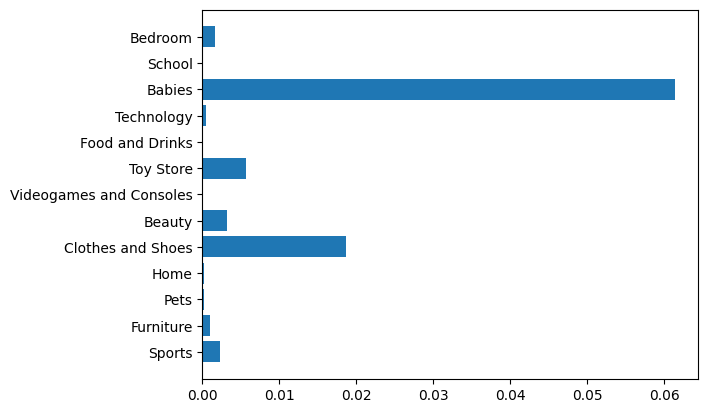

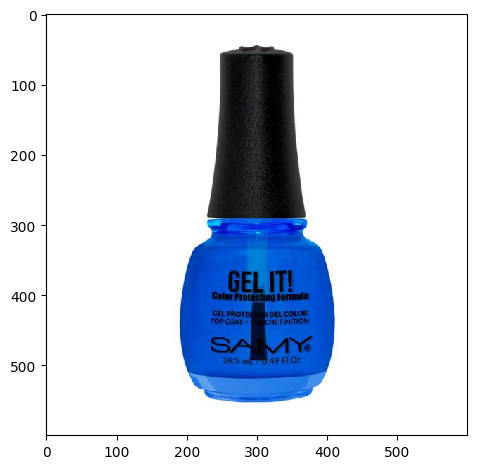

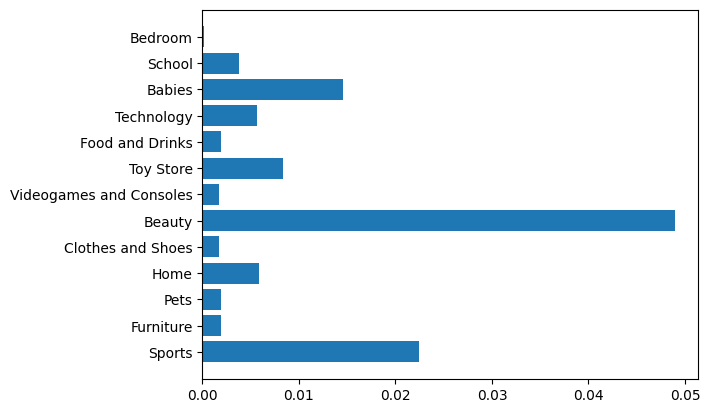

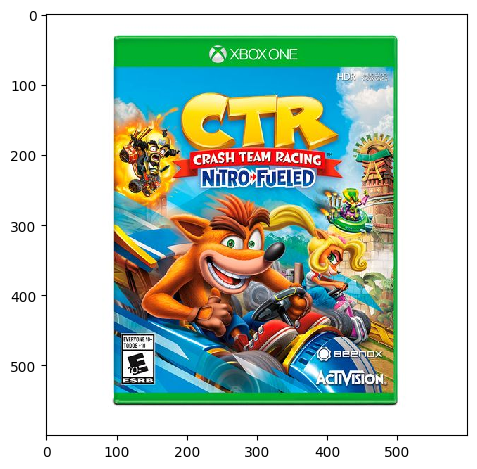

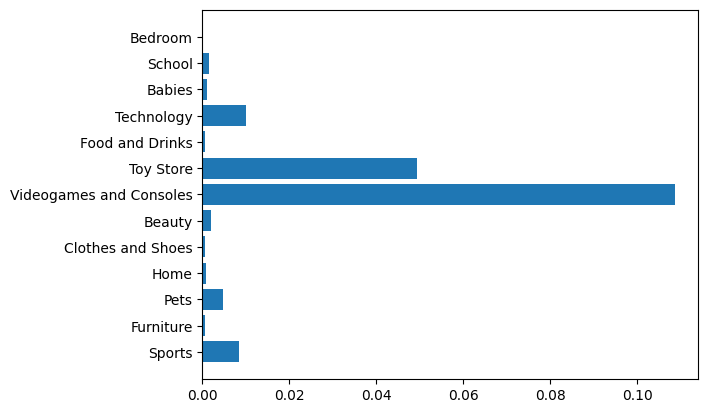

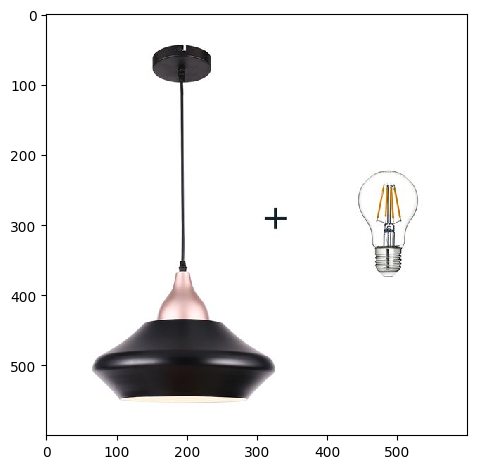

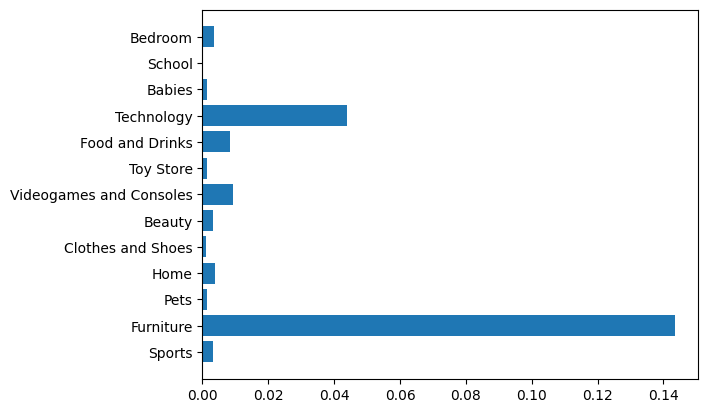

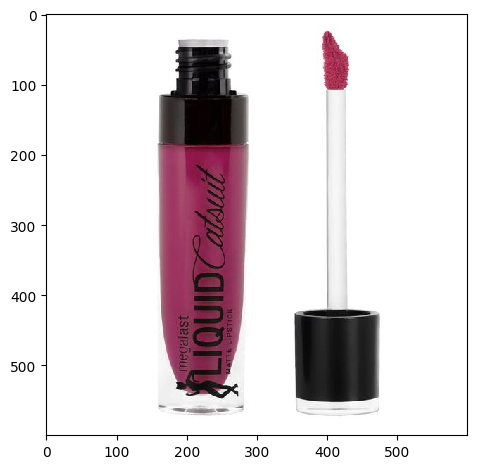

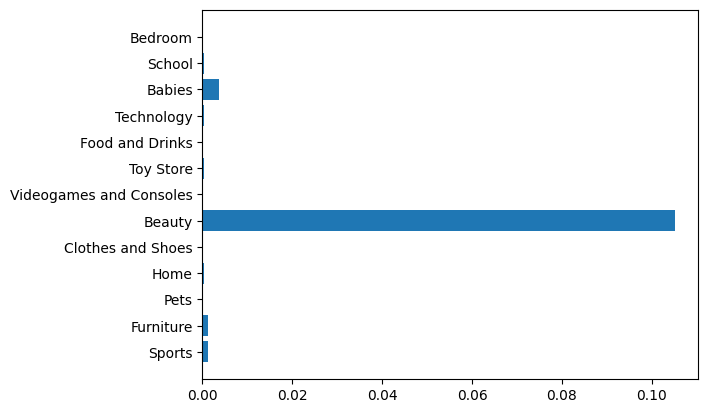

In [60]:
with torch.no_grad():
    text = clip.tokenize(CATEGORIES).to(device)

    for img in IMAGES[:10]:
        image = preprocess(Image.fromarray(img)).unsqueeze(0).to(device)
        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().detach().numpy()

        io.imshow(img)
        io.show()
        plt.barh(CATEGORIES, np.squeeze(probs))
        plt.show()